In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
 
def parse_if_number(s): 
    try: return float(s) 
    except: return True if s=="true" else False if s=="false" else s if s else None 
 
def parse_ndarray(s): 
    return np.fromstring(s, sep=' ') if s else None 

In [14]:
# vector Name
pdr_vector_period = 'periodCAM:vector'# decode
pdr_vector_time = 'periodCAM:vector'# dist

csvName = [
#     'Aircomp_app_53.csv', 
#     'CAM_app_53.csv'
    'Aircomp_14_app.csv', 
    'CAM_14_period.csv'
]

font_size = 34


In [15]:

#  opp_scavetool export -f '("tbDecoded:vector" OR "txRxDistanceTB:vector")' -F CSV-R CAM-0-20221109-09\:16\:01-10447.sca CAM-0-20221109-09\:16\:01-10447.vec -o test-sztm.csv

for x in range(len(csvName)): 
    print(csvName[x])


Aircomp_14_app.csv
CAM_14_period.csv


In [16]:
# ReadFile and extract Data
# new_df = pd.DataFrame()
new_df = []

for x in range(len(csvName)): 
    print(csvName[x])
    vectime = [] # dist
    period = [] # decode
    df = pd.read_csv("./Aircomp/"+csvName[x], converters = { 
        'attrvalue': parse_if_number, 
        'vectime': parse_ndarray, 
        'vecvalue': parse_ndarray
    })
    vectime = df[(df["name"] == pdr_vector_time) & (df["vectime"].notnull())]
    vectime["vectime"] -=  500
    period = df[(df["name"] == pdr_vector_period) & (df["vectime"].notnull())] 
#     vectime = vectime[["module", "vectime"]] 
#     vectime.rename(columns={"vecvalue": "vectime"}, inplace=True) 
#     period   = period[["module", "vecvalue"]] 
#     period.rename(columns={"vecvalue": "period"}, inplace=True) 
#     new_df.append(pd.merge(vectime, period, on='module', how='inner'))
    
    new_df.append(vectime[["module", "vectime", "vecvalue"]])

Aircomp_14_app.csv
CAM_14_period.csv


/home/alanqq0624/.conda/envs/sumo/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [17]:
print(new_df)
print("-----------")
print(new_df[x]['vectime'].to_list()[0])
# print(isinstance(new_df[0], pd.DataFrame))

[                   module                                            vectime  \
152  Highway.car[14].appl  [0.8790000000000191, 0.8790000000000191, 0.947...   

                                              vecvalue  
152  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.010102759, 0....  ,                    module                                            vectime  \
148  Highway.car[14].appl  [0.8790000000000191, 0.978999999999985, 1.0699...   

                                              vecvalue  
148  [0.1, 0.090909091, 0.090909091, 0.090909091, 0...  ]
-----------
[ 0.879       0.979       1.06990909  1.16081818  1.25172727  1.34263636
  1.43354546  1.52445455  1.61536364  1.70627273  1.79718182  1.88809091
  1.979       2.06164463  2.14428926  2.22693388  2.30957851  2.39222314
  2.47486777  2.5575124   2.64015703  2.72280165  2.80544628  2.88809091
  2.97073554  3.06164463  3.15255372  3.24346281  3.3343719   3.42528099
  3.51619008  3.60709917  3.69800826  3.78891736  3.87982645  3.970735

In [18]:
x_max = new_df[0].vectime.apply(max)
y_max = new_df[0].vecvalue.apply(max)
x_axis = []
y_axis = []
for x in range(len(csvName)): 
    x_axis.append(new_df[x].vectime.apply(max))
    y_axis.append(new_df[x].vecvalue.apply(max))
print(x_max)
print(y_axis)

152    92.77782
Name: vectime, dtype: float64
[152    0.1
Name: vecvalue, dtype: float64, 148    0.259374
Name: vecvalue, dtype: float64]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


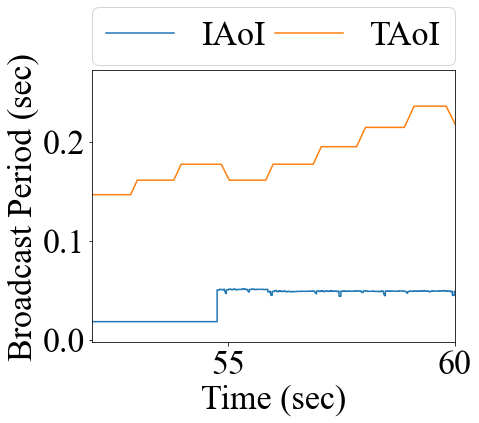

In [19]:
# Plot
ax = plt.figure(figsize=(6.5, 5)) 
plt.rcParams.update({
    'font.size': font_size, 
    "font.family": "serif", 
    "font.serif": ["Times New Roman"], 
})

lineLabel = ['IAoI', 'TAoI']
for x in range(len(csvName)): 
    plt.plot(new_df[x]['vectime'].to_list()[0], new_df[x]['vecvalue'].to_list()[0], label=lineLabel[x]) 

# ax.tick_params(direction='in') 
 
# ax.set_xlim([0, (max(distances) + 1)]) 
# ax.set_xlim([52, 60]) 
plt.xlim([52, 60]) 
# ax.set_ylim([0, 0.5]) 
# plt.xticks(np.arange(0, (max(distances))+50, step=50)) 
# plt.xticks(np.arange(0, (np.amax(distances))+50, step=50)) 
# plt.yticks(np.arange(0, (101), step=10)) 

plt.xlabel('Time (sec)', fontsize=font_size)
plt.ylabel('Broadcast Period (sec)', fontsize=font_size)

plt.legend(loc="lower left", bbox_to_anchor=(0, 1.02, 1, 0.2), mode="expand", borderaxespad=0, ncol=2) 

# plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95)
 
plt.savefig("Results_Period.eps", format='eps',  bbox_inches='tight')

plt.show() 
# plt.close(fig)